# Linear Regression untuk analisa harga rumah

### Pertama kita ekplorasi data yang digunakan, apa yang dapat di analisa dan di implementasikan Linear Regression

-----

### Tahap analisa dan investigasi, feature apa dan data seperti apa yang dapat diimplementasikan Linear Regression 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Configuring print options
desired_width=320
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', desired_width)
np.set_printoptions(linewidth=desired_width)

In [14]:
# Import data
melbourneHouseFull = pd.read_csv("MELBOURNE_HOUSE.csv")

# Summarise the data
print(melbourneHouseFull.head())

#sebelum menghapus missing value
print('Number of rows:', melbourneHouseFull.shape[0])

melbourneHouseFull = melbourneHouseFull.dropna()
#setelah menghapus missing value
print('Number of rows remaining:', melbourneHouseFull.shape[0])

print(melbourneHouseFull.head())
print(melbourneHouseFull.columns.values)
print(melbourneHouseFull.describe())

       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             R

#### Dari data yang sudah dihilangkan missing valuenya, kami disini mencoba menganalisa 2 feature/kolom
-----
- Building Area (luas bangunan), Ini biasanya diukur dalam square metres (meter persegi) atau square feet (kaki persegi). 
- Price (harga), yang dimaksud adalah harga rumah, dinotasikan dalam dollar Australia

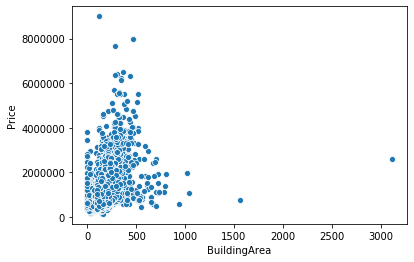

In [16]:
#memvisualisasikan 2 feature yang akan kami analisa dalam sebuah plot seaborn

#ambil hanya 2 kolom dari data yang sudah kita gunakan sebelumnya
melbourneHouses = melbourneHouseFull[['BuildingArea', 'Price']]

#lalu bentuk plot dengan luas bangunan sebagai sumbu X, dan harga menjadi sumbu Y
sns.scatterplot(melbourneHouses.BuildingArea,melbourneHouses.Price)
plt.show()

#### dari grafik plot diatas terlihat sangat padat dan sulit melihat hubungan sebuah linear disana, maka dari itu kami coba melakukan pendekatan dengan menghapus outlier yg sangat jauh, agar datanya lebih jelas terlihat hubungan linearnya

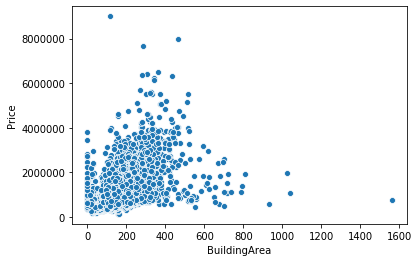

In [13]:
#tentukan saja outliernya adalah data yang terbesar dari fitur building area
outliers = melbourneHouses.BuildingArea.max()
melbourneHousesEdited = melbourneHouses[melbourneHouses['BuildingArea'] < outliers]

#lalu cetak plot lagi
sns.scatterplot(melbourneHousesEdited.BuildingArea,melbourneHousesEdited.Price)
plt.show()

#### walaupun sudah mengurangi outlier terbesarnya, tetapi datanya tetap padat, dikarenakan data yang ditampilkan merupakan data dari seluruh 'suburb' (daerah / bagian kota). Jadi selanjutnya kami akan mencoba pilih salah satu suburb

In [22]:
#lalu coba tampilkan jumlah masing2 suburb dengan kembali menggunakan data yg paling awal
suburbCount = melbourneHouseFull['Suburb'].value_counts()
suburbCount.head()

Reservoir         194
Richmond          155
Brunswick         152
Bentleigh East    138
Coburg            135
Name: Suburb, dtype: int64

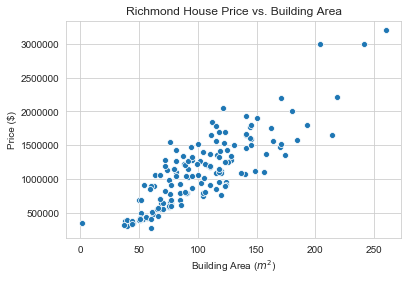

In [63]:
#dari kelima suburb diatas, setelah kami coba bentuk sebaran data  
#yg bagus adalah suburb Richmond, maka kami akan mencoba menggunakan suburb tersebut

richmondHouses = melbourneHouseFull[melbourneHouseFull['Suburb'] == 'Richmond']
sns.scatterplot(richmondHouses.BuildingArea, richmondHouses.Price)
plt.title('Richmond House Price vs. Building Area')
plt.xlabel('Building Area ($m^2$)')
plt.ylabel('Price ($)')
plt.show()

#### grafik diatas sudah menunjukan sebuah bentuk persebaran data yang bagus dalam bentuk linear, terlihat memiliki korelasi yg positif antara feature BuildingArea dengan feature Price

### Selanjutnya baru mengimplementasikan algoritma Linear Regression pada data diatas

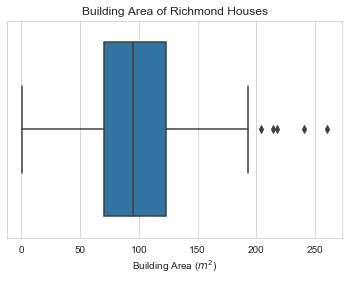

In [64]:
# sebelum lanjut implementasi, kami coba bersihkan lagi data dari outlier dengan menggunakan boxplot,
# karena dengan boxplot dapat terlihat kepadatan datanya dan terlihat beberapa data yg menjadi outlier dan akan kami hapus

# Boxplot berdasarkan building area
sns.set_style("whitegrid")
sns.boxplot(richmondHouses.BuildingArea)
plt.xlabel('Building Area ($m^2$)')
plt.title('Building Area of Richmond Houses')
plt.show()

           Price  BuildingArea            Address
8739   3200000.0         260.0      78 Davison St
8846   3001000.0         241.0      30 Highett St
33693  2210000.0         218.0   76 Buckingham St
8908   1645000.0         214.0  176 Buckingham St
13612  3000000.0         204.0      2 Portland St


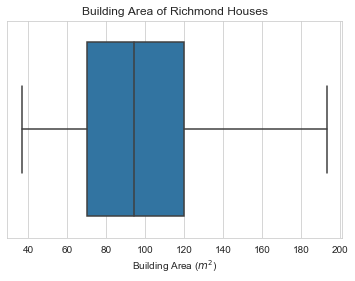

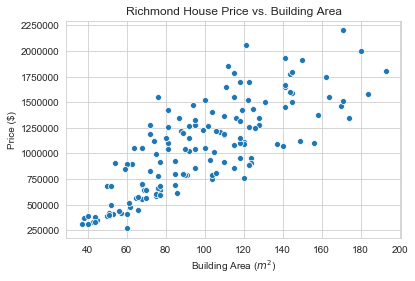

In [65]:
# grafik diatas menunjukan outliernya memiliki building area lebih dari 200, sehingga bisa langsung kita coba tampilkan apakah benar

outliers = richmondHouses[richmondHouses.BuildingArea > 200]
print(outliers[['Price','BuildingArea','Address']].sort_values('BuildingArea',ascending=False))

# maka langsung saja hapus outliers yang tidak diinginkan
# temasuk data dengan luas bangunan 0 yang muncul pada plot scatter sebelumnya
richmondHouses = richmondHouses[(richmondHouses.BuildingArea < 200) & (richmondHouses.BuildingArea > 1)]


# cetak boxplot kembali
sns.set_style("whitegrid")
sns.boxplot(richmondHouses.BuildingArea)
plt.xlabel('Building Area ($m^2$)')
plt.title('Building Area of Richmond Houses')
plt.show()

# cetak plot
sns.scatterplot(richmondHouses.BuildingArea, richmondHouses.Price)
plt.title('Richmond House Price vs. Building Area')
plt.xlabel('Building Area ($m^2$)')
plt.ylabel('Price ($)')
plt.show()

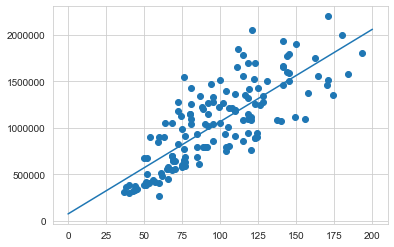

In [103]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

X = richmondHouses.BuildingArea
y = richmondHouses.Price

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 200)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [104]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     9919.529427657912
Model intercept: 76090.69927585288
